# Credit Card Fraud Detection

![](https://techbox.dennikn.sk/wp-content/uploads/2016/09/Kaspersky-988x553.jpg)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [49]:
fraud_data = pd.read_csv("creditcard.csv")

## Exploratory Data Analysis

In [50]:
pd.options.display.max_columns = 999
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
fraud_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [52]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [53]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
# Determine if ANY Value in a Series is Missing
fraud_data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## Checking the target classes


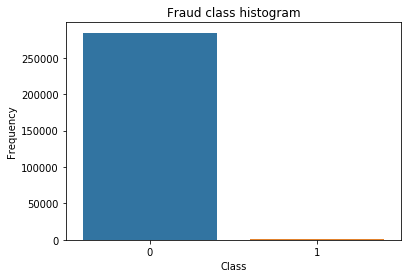

In [55]:
sns.countplot(fraud_data["Class"] , label="count")
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [56]:
fraud_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Clearly the data is totally unbalanced ! 


In [57]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="840" height="460" src="https://www.youtube.com/embed/FunoDTsdr2E?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Graph distribution

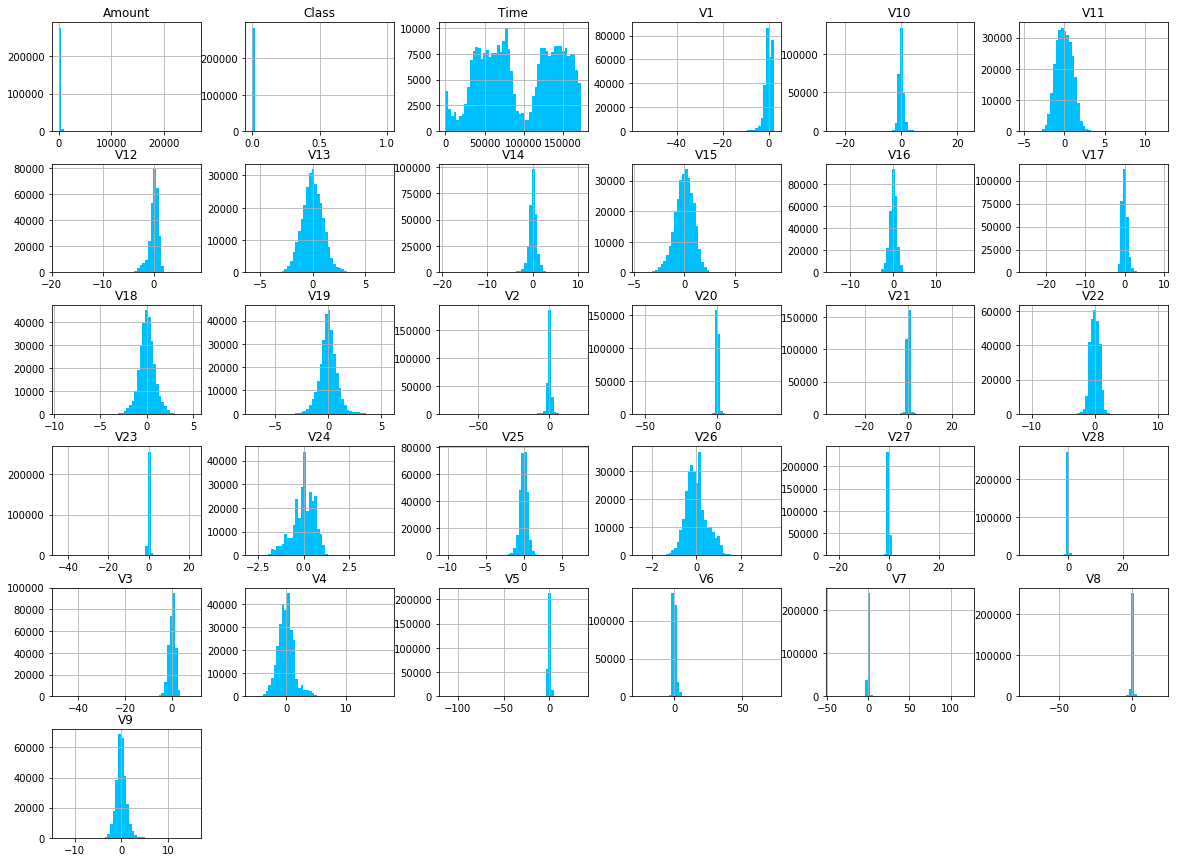

In [58]:
fraud_data.hist(bins=50, figsize=(20,15), color = 'deepskyblue')

plt.show()

 ## Time vs Class

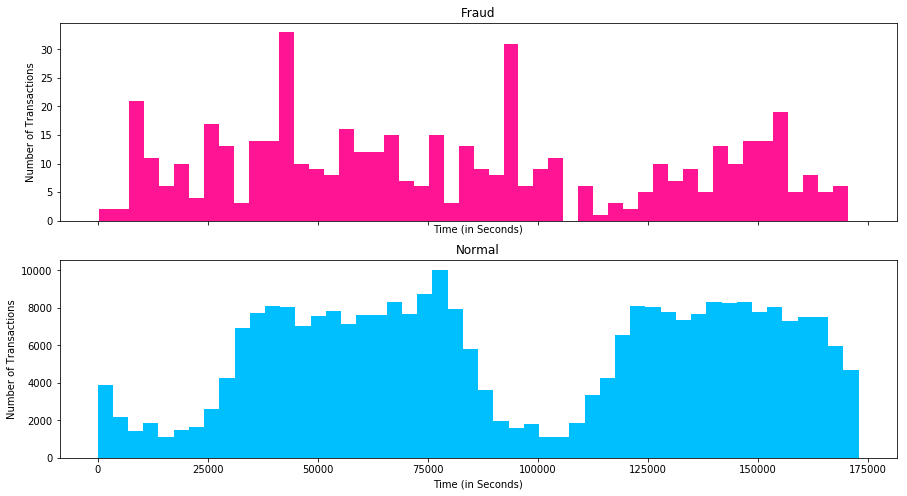

In [59]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
bins = 50

ax1.hist(fraud_data.Time[fraud_data.Class == 1], bins = bins, color = "deeppink")
ax1.set_xlabel(("Time (in Seconds)"))
ax1.set_ylabel("Number of Transactions")
ax1.set_title("Fraud")
ax2.hist(fraud_data.Time[fraud_data.Class == 0], bins= bins, color = "deepskyblue");
ax2.set_xlabel(("Time (in Seconds)"))
ax2.set_ylabel("Number of Transactions")
ax2.set_title("Normal");

## Time vs Amount vs Class

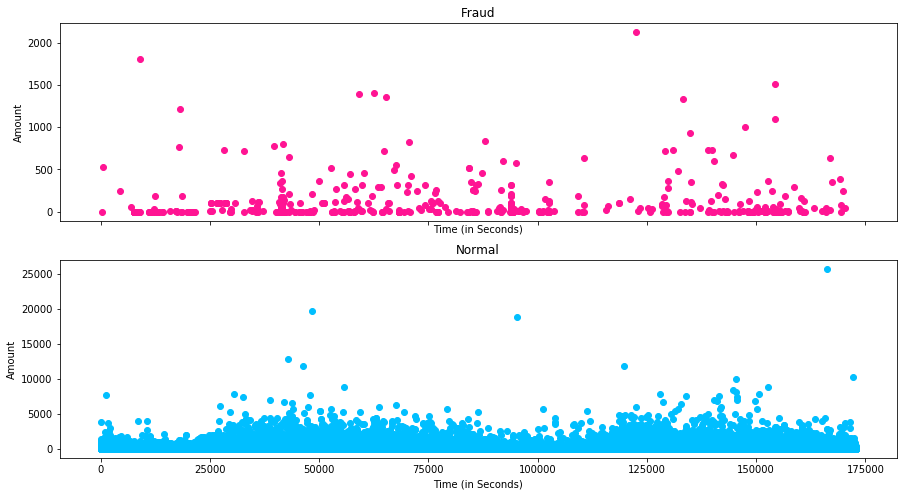

In [60]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
bins = 50

ax1.scatter(fraud_data.Time[fraud_data.Class == 1], fraud_data.Amount[fraud_data.Class ==1], color = "deeppink")
ax1.set_xlabel(("Time (in Seconds)"))
ax1.set_ylabel("Amount")
ax1.set_title("Fraud")
ax2.scatter(fraud_data.Time[fraud_data.Class == 0], fraud_data.Amount[fraud_data.Class ==0], color = "deepskyblue");
ax2.set_xlabel(("Time (in Seconds)"))
ax2.set_ylabel("Amount")
ax2.set_title("Normal");

In [61]:
## Correlation with Response Variable 
fraud_data2 = fraud_data.drop(columns = ["Class", "Time"])

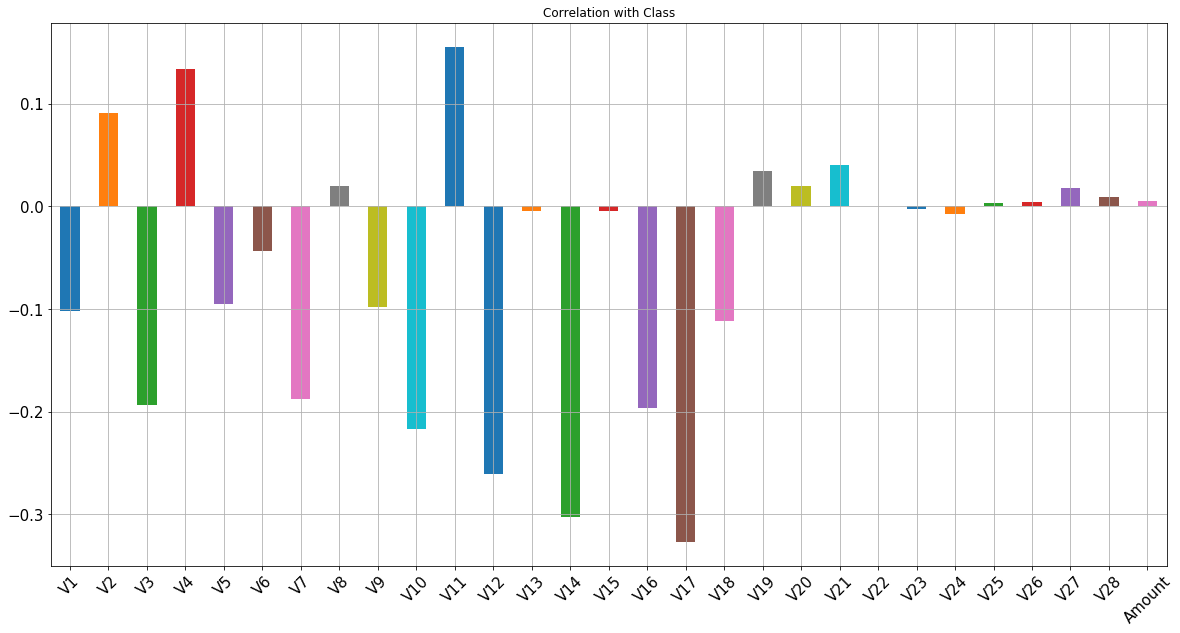

In [62]:
fraud_data2.corrwith(fraud_data.Class).plot.bar(figsize=(20,10),
              title = "Correlation with Class",
              fontsize = 15, rot = 45,
              grid = True);

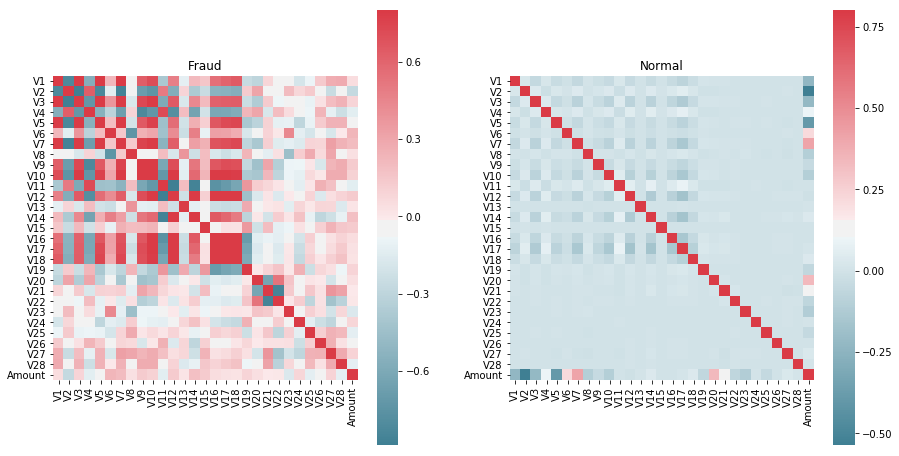

In [63]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmaps
sns.heatmap(fraud_data2[fraud_data.Class == 1].corr(), cmap=cmap, vmax = .8, square=True, ax = ax1)
ax1.set_title('Fraud')

sns.heatmap(fraud_data2[fraud_data.Class == 0].corr(), cmap=cmap, vmax = .8, square=True, ax = ax2);
ax2.set_title('Normal');

## Splitting the dataset into the Training set and Test set

In [64]:
X = fraud_data.drop(columns=["Class"])
y = fraud_data["Class"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [68]:
X_test.shape, y_test.shape

((85443, 30), (85443,))

In [69]:
print("Proportion of Normal data in training data is:",len(y_train[y_train==0])/len(X_train))
print("Proportion of Fraud data in training data is:",len(y_train[y_train==1])/len(X_train))

Proportion of Normal data in training data is: 0.9982694970004614
Proportion of Fraud data in training data is: 0.0017305029995385325


## Model Building

## Use Random Forest Algorithm

#### A brief about Random Forest Algorithm
Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.  Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests will avoid overfitting which will enhance the accuracy of the model on new data. This is a Bagging based algorithm which is used for reducing Overfitting in order to create strong learners for generating accurate predictions.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced")

In [25]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [26]:
y_predrf = rf.predict(X_test)

In [27]:
y_predrf_proba = rf.predict_proba(X_test)

In [28]:
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, precision_score, precision_recall_curve, recall_score, roc_auc_score

In [70]:
def pr_auc_score(y_true, y_score):
    """
    Generates the Area Under the Curve for precision and recall.
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_score[:, 1])
    area = auc(recall, precision)
    return area

In [63]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_predrf))
print("Classification report :")
print(classification_report(y_test, y_predrf))
print("Accuracy :",(accuracy_score(y_test, y_predrf)))
print("Area under the curve :", (roc_auc_score(y_test, y_predrf)))
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc_score(y_test, y_predrf_proba))

Confusion matrix :
[[85290     6]
 [   35   112]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy : 0.9995201479348805
Area under the curve : 0.8809172093147896
Area Under the Precision-Recall Curve (AUPRC): 0.8436668074569775


In [64]:
acc = accuracy_score(y_test, y_predrf)
prec = precision_score(y_test, y_predrf)
rec = recall_score(y_test, y_predrf)
f1 = f1_score(y_test, y_predrf)
auprc = pr_auc_score(y_test, y_predrf_proba)

In [65]:
results = pd.DataFrame([["Random Forest", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [66]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.99952,0.949153,0.761905,0.845283,0.843667


## Use Gradient Boosting Alogrithm

#### A Brief about Gradient Boosting Algorithm
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function(a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event). This is a Boosting based algorithm which is an ensemble technique to combine weak learners to create a strong learner that can make accurate predictions. 

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
'''params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5, 'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble. GradientBoostingClassifier(**params)
n_estimators : int (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting, so a large number usually results in better performance.
max_depth: integer, optional (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. The best value depends on the interaction of the input variables.
subsample: float, optional (default=1.0)
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
learning_rate : float, optional (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
'''

gb = GradientBoostingClassifier(n_estimators=500, max_depth=3, subsample=0.5, 
                                learning_rate=0.01, min_samples_leaf=1, random_state=3)

In [69]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [70]:
y_predgb = gb.predict(X_test)

In [71]:
y_predgb_proba = gb.predict_proba(X_test)

In [72]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_predgb))
print("Classification report :")
print(classification_report(y_test, y_predgb))
print("Accuracy :",(accuracy_score(y_test, y_predgb)))
print("Area under the curve :", (roc_auc_score(y_test, y_predgb)))
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc_score(y_test, y_predgb_proba))

Confusion matrix :
[[85280    16]
 [   39   108]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.73      0.80       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy : 0.9993562960102056
Area under the curve : 0.867253147741933
Area Under the Precision-Recall Curve (AUPRC): 0.7089683711909455


In [73]:
acc = accuracy_score(y_test, y_predgb)
prec = precision_score(y_test, y_predgb)
rec = recall_score(y_test, y_predgb)
f1 = f1_score(y_test, y_predgb)
auprc = pr_auc_score(y_test, y_predgb_proba)

In [74]:
model_results = pd.DataFrame([["Gradient Boosting", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [75]:
results = results.append(model_results, ignore_index=True)

In [76]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.999520,0.949153,0.761905,0.845283,0.843667
1,Gradient Boosting,0.999356,0.870968,0.734694,0.797048,0.708968


## Use Extreme Gradient Boosting Alogrithm

#### A Brief about Extreme Gradient Boosting Algorithm
XGBoost is one of the implementations of Gradient Boosting concept, but what makes XGBoost unique is that it uses “a more regularized model formalization to control over-fitting, which gives it better performance,” according to the author of the algorithm, Tianqi Chen. Therefore, it helps to reduce overfitting.

In [77]:
from xgboost.sklearn import XGBClassifier

In [78]:
xgb_model = XGBClassifier()

In [79]:
# List the default parameters.
print(xgb_model.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 1}


In [80]:
xgb_model.fit(X_train, y_train, eval_metric=["aucpr"], eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-aucpr:0.765275	validation_1-aucpr:0.704112
[1]	validation_0-aucpr:0.766009	validation_1-aucpr:0.701005
[2]	validation_0-aucpr:0.786139	validation_1-aucpr:0.737627
[3]	validation_0-aucpr:0.7875	validation_1-aucpr:0.749396
[4]	validation_0-aucpr:0.788318	validation_1-aucpr:0.746766
[5]	validation_0-aucpr:0.791327	validation_1-aucpr:0.748545
[6]	validation_0-aucpr:0.790929	validation_1-aucpr:0.748327
[7]	validation_0-aucpr:0.794449	validation_1-aucpr:0.746775
[8]	validation_0-aucpr:0.794126	validation_1-aucpr:0.7492
[9]	validation_0-aucpr:0.80414	validation_1-aucpr:0.7664
[10]	validation_0-aucpr:0.805521	validation_1-aucpr:0.770868
[11]	validation_0-aucpr:0.81519	validation_1-aucpr:0.781762
[12]	validation_0-aucpr:0.822767	validation_1-aucpr:0.786457
[13]	validation_0-aucpr:0.825709	validation_1-aucpr:0.792608
[14]	validation_0-aucpr:0.827122	validation_1-aucpr:0.7938
[15]	validation_0-aucpr:0.82761	validation_1-aucpr:0.792999
[16]	validation_0-aucpr:0.82993	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [81]:
y_predxgb = xgb_model.predict(X_test)

In [82]:
y_predxgb_proba = xgb_model.predict_proba(X_test)

In [83]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_predxgb))
print("Classification report :")
print(classification_report(y_test, y_predxgb))
print("Accuracy :",(accuracy_score(y_test, y_predxgb)))
print("Area under the curve :", (roc_auc_score(y_test, y_predxgb)))
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc_score(y_test, y_predxgb_proba))

Confusion matrix :
[[85288     8]
 [   36   111]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.76      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy : 0.9994850368081645
Area under the curve : 0.8775041248913746
Area Under the Precision-Recall Curve (AUPRC): 0.8428810146820906


In [84]:
acc = accuracy_score(y_test, y_predxgb)
prec = precision_score(y_test, y_predxgb)
rec = recall_score(y_test, y_predxgb)
f1 = f1_score(y_test, y_predxgb)
auprc = pr_auc_score(y_test, y_predxgb_proba)

In [85]:
model_results = pd.DataFrame([["Extreme Gradient Boosting", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [86]:
results = results.append(model_results, ignore_index=True)

In [87]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.999520,0.949153,0.761905,0.845283,0.843667
1,Gradient Boosting,0.999356,0.870968,0.734694,0.797048,0.708968
2,Extreme Gradient Boosting,0.999485,0.932773,0.755102,0.834586,0.842881


## Dealing with imbalanced data

## Approach 1:  Random Under Sampling
#### This is done to reduce the imbalance between frauds & non frauds

Undersampling works by sampling the dominant class to reduce the number of samples. One simple way of undersampling is randomly selecting a handful of samples from the class that is overrepresented.

The RandomUnderSampler class from the imblearn library is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. It works by performing k-means clustering on the majority class and removing data points from high-density centroids.

![](https://flypaper.soundfly.com/wp-content/uploads/2016/03/Araabmuzik-using-samplers.jpg)

In [89]:
y_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [90]:
from imblearn.under_sampling import RandomUnderSampler

In [91]:
rus = RandomUnderSampler(random_state=42)

In [92]:
X_res, y_res = rus.fit_sample(X_train, y_train)

In [93]:
X_train_res_under = pd.DataFrame(data=X_res, columns=X_train.columns)
y_train_res_under = pd.DataFrame(data=y_res, columns=["Class"])

In [94]:
y_train_res_under.Class.value_counts()

1    345
0    345
Name: Class, dtype: int64

### Random Forest Classifier on undersampled data


In [95]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train_res_under, y_train_res_under)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
y_pred_rf_under = rf.predict(X_test)

In [101]:
y_predrf_proba_under = rf.predict_proba(X_test)

In [102]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred_rf_under))
print("Classification report :")
print(classification_report(y_test, y_pred_rf_under))
print("Accuracy :",(accuracy_score(y_test, y_pred_rf_under)))
print("Area under the curve :", (roc_auc_score(y_test, y_pred_rf_under)))
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc_score(y_test, y_predrf_proba_under))

Confusion matrix :
[[83972  1324]
 [   17   130]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.09      0.88      0.16       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.93      0.58     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy : 0.9843053263579228
Area under the curve : 0.9344156627197868
Area Under the Precision-Recall Curve (AUPRC): 0.7707997734803771


In [103]:
acc = accuracy_score(y_test, y_pred_rf_under)
prec = precision_score(y_test, y_pred_rf_under)
rec = recall_score(y_test, y_pred_rf_under)
f1 = f1_score(y_test, y_pred_rf_under)
auprc = pr_auc_score(y_test, y_predrf_proba_under)

In [104]:
model_results = pd.DataFrame([["Random Forest Classifier + Undersampled data", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [105]:
results = results.append(model_results, ignore_index=True)

In [106]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.999520,0.949153,0.761905,0.845283,0.843667
1,Gradient Boosting,0.999356,0.870968,0.734694,0.797048,0.708968
2,Extreme Gradient Boosting,0.999485,0.932773,0.755102,0.834586,0.842881
3,Random Forest Classifier + Undersampled data,0.984305,0.089409,0.884354,0.162399,0.770800


### Gradient Boost Algorithm on undersampled data

In [107]:
GB = GradientBoostingClassifier(n_estimators=650, max_depth=3, subsample=0.5, 
                                learning_rate=0.01, min_samples_leaf=1, random_state=3)

In [108]:
GB.fit(X_train_res_under, y_train_res_under)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=650,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [109]:
y_pred_gb_under = GB.predict(X_test)

In [110]:
y_predgb_proba_under = GB.predict_proba(X_test)

In [111]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred_gb_under))
print("Classification report :")
print(classification_report(y_test, y_pred_gb_under))
print("Accuracy :",(accuracy_score(y_test, y_pred_gb_under)))
print("Area under the curve :", (roc_auc_score(y_test, y_pred_gb_under)))
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc_score(y_test, y_predgb_proba_under))

Confusion matrix :
[[83427  1869]
 [   16   131]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.89      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy : 0.9779385087134113
Area under the curve : 0.9346222661827814
Area Under the Precision-Recall Curve (AUPRC): 0.6972849613740874


In [116]:
acc = accuracy_score(y_test, y_pred_gb_under)
prec = precision_score(y_test, y_pred_gb_under)
rec = recall_score(y_test, y_pred_gb_under)
f1 = f1_score(y_test, y_pred_gb_under)
auprc = pr_auc_score(y_test, y_predgb_proba_under)

In [117]:
model_results = pd.DataFrame([["Gradient Boost + Undersampled data", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [118]:
results = results.append(model_results, ignore_index=True)

In [121]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.999520,0.949153,0.761905,0.845283,0.843667
1,Gradient Boosting,0.999356,0.870968,0.734694,0.797048,0.708968
2,Extreme Gradient Boosting,0.999485,0.932773,0.755102,0.834586,0.842881
3,Random Forest Classifier + Undersampled data,0.984305,0.089409,0.884354,0.162399,0.770800
5,Gradient Boost + Undersampled data,0.977939,0.065500,0.891156,0.122031,0.697285


### Extreme Gradient Boost Algorithm on undersampled data

In [122]:
from xgboost.sklearn import XGBClassifier

In [123]:
XGB = XGBClassifier()

In [124]:
# List the default parameters.
print(XGB.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 1}


In [125]:
XGB.fit(X_train_res_under, y_train_res_under, eval_metric=["aucpr"], eval_set=[((X_train_res_under, y_train_res_under)),(X_test, y_test)])

[0]	validation_0-aucpr:0.982035	validation_1-aucpr:0.098814
[1]	validation_0-aucpr:0.986024	validation_1-aucpr:0.22975
[2]	validation_0-aucpr:0.987011	validation_1-aucpr:0.230189
[3]	validation_0-aucpr:0.987511	validation_1-aucpr:0.23017
[4]	validation_0-aucpr:0.987868	validation_1-aucpr:0.231936
[5]	validation_0-aucpr:0.988123	validation_1-aucpr:0.232719
[6]	validation_0-aucpr:0.988131	validation_1-aucpr:0.235057
[7]	validation_0-aucpr:0.990363	validation_1-aucpr:0.235136
[8]	validation_0-aucpr:0.991192	validation_1-aucpr:0.235426
[9]	validation_0-aucpr:0.991522	validation_1-aucpr:0.234916
[10]	validation_0-aucpr:0.992339	validation_1-aucpr:0.601743
[11]	validation_0-aucpr:0.992519	validation_1-aucpr:0.601329
[12]	validation_0-aucpr:0.992773	validation_1-aucpr:0.600684
[13]	validation_0-aucpr:0.9927	validation_1-aucpr:0.600885
[14]	validation_0-aucpr:0.99281	validation_1-aucpr:0.614815
[15]	validation_0-aucpr:0.993119	validation_1-aucpr:0.69794
[16]	validation_0-aucpr:0.99355	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [126]:
y_pred_xgb_under = XGB.predict(X_test)

In [127]:
y_predxgb_proba_under = XGB.predict_proba(X_test)

In [128]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred_xgb_under))
print("Classification report :")
print(classification_report(y_test, y_pred_xgb_under))
print("Accuracy :",(accuracy_score(y_test, y_pred_xgb_under)))
print("Area under the curve :", (roc_auc_score(y_test, y_pred_xgb_under)))
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc_score(y_test, y_predxgb_proba_under))

Confusion matrix :
[[83098  2198]
 [   15   132]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.90      0.11       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Accuracy : 0.9740996921924557
Area under the curve : 0.9360950485990683
Area Under the Precision-Recall Curve (AUPRC): 0.7237806233718714


In [129]:
acc = accuracy_score(y_test, y_pred_xgb_under)
prec = precision_score(y_test, y_pred_xgb_under)
rec = recall_score(y_test, y_pred_xgb_under)
f1 = f1_score(y_test, y_pred_xgb_under)
auprc = pr_auc_score(y_test, y_predxgb_proba_under)

In [130]:
model_results = pd.DataFrame([["Extreme Gradient Boost + Undersampled data", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [131]:
results = results.append(model_results, ignore_index=True)

In [132]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.999520,0.949153,0.761905,0.845283,0.843667
1,Gradient Boosting,0.999356,0.870968,0.734694,0.797048,0.708968
2,Extreme Gradient Boosting,0.999485,0.932773,0.755102,0.834586,0.842881
3,Random Forest Classifier + Undersampled data,0.984305,0.089409,0.884354,0.162399,0.770800
4,Gradient Boost + Undersampled data,0.977939,0.065500,0.891156,0.122031,0.697285
5,Extreme Gradient Boost + Undersampled data,0.974100,0.056652,0.897959,0.106581,0.723781


## Approach 2: Oversampling SMOTE (Synthetic Minority Over-sampling Technique)

One popular way to deal with imbalanced data is by oversampling. To oversample means to artificially create observations in our data set belonging to the class that is under represented in our data.

One common technique is SMOTE — Synthetic Minority Over-sampling Technique. At a high level, SMOTE creates synthetic observations of the minority class (in this case, fraudulent transactions). At a lower level, SMOTE performs the following steps:

* Finding the k-nearest-neighbors for minority class observations (finding similar observations)
* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

![](http://www.bossfinal.com/wp-content/uploads/2009/09/dj-hero-daft-punk_2.jpg)

In [71]:
y_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
smote_algo = SMOTE(random_state=0)
X_train_res_over, y_train_res_over = smote_algo.fit_sample(X_train, y_train)

In [74]:
X_train_res_over = pd.DataFrame(data=X_train_res_over, columns=X_train.columns)

In [75]:
y_train_res_over = pd.DataFrame(data=y_train_res_over, columns=["Class"])

In [76]:
y_train_res_over.Class.value_counts()

1    199019
0    199019
Name: Class, dtype: int64

### Random Forest Classifier on oversampled data

In [140]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train_res_over, y_train_res_over)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [141]:
y_pred_rf_over = rf.predict(X_test)

In [142]:
y_predrf_proba_over = rf.predict_proba(X_test)

In [143]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred_rf_over))
print("Classification report :")
print(classification_report(y_test, y_pred_rf_over))
print("Accuracy :",(accuracy_score(y_test, y_pred_rf_over)))
print("Area under the curve :", (roc_auc_score(y_test, y_pred_rf_over)))
print("Area Under the Precision-Recall Curve (AUPRC):",  pr_auc_score(y_test, y_predrf_proba_over))

Confusion matrix :
[[85281    15]
 [   27   120]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.82      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy : 0.9995084442259752
Area under the curve : 0.9080753362121439
Area Under the Precision-Recall Curve (AUPRC): 0.8476877672608756


In [144]:
acc = accuracy_score(y_test, y_pred_rf_over)
prec = precision_score(y_test, y_pred_rf_over)
rec = recall_score(y_test, y_pred_rf_over)
f1 = f1_score(y_test, y_pred_rf_over)
auprc = pr_auc_score(y_test, y_predrf_proba_over)

In [145]:
model_results = pd.DataFrame([["Random Forest Classifier + SMOTE", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [146]:
results = results.append(model_results, ignore_index=True)

In [147]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.999520,0.949153,0.761905,0.845283,0.843667
1,Gradient Boosting,0.999356,0.870968,0.734694,0.797048,0.708968
2,Extreme Gradient Boosting,0.999485,0.932773,0.755102,0.834586,0.842881
3,Random Forest Classifier + Undersampled data,0.984305,0.089409,0.884354,0.162399,0.770800
4,Gradient Boost + Undersampled data,0.977939,0.065500,0.891156,0.122031,0.697285
5,Extreme Gradient Boost + Undersampled data,0.974100,0.056652,0.897959,0.106581,0.723781
6,Random Forest Classifier + SMOTE,0.999508,0.888889,0.816327,0.851064,0.847688


### Gradient Boost Algorithm on oversampled data

In [148]:
GB = GradientBoostingClassifier(n_estimators=500, max_depth=3, subsample=0.5, 
                                learning_rate=0.01, min_samples_leaf=1, random_state=3)

In [149]:
GB.fit(X_train_res_over, y_train_res_over)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [150]:
y_pred_gb_over = GB.predict(X_test)

In [151]:
y_predgb_proba_over = GB.predict_proba(X_test)

In [152]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred_gb_over))
print("Classification report :")
print(classification_report(y_test, y_pred_gb_over))
print("Accuracy :",(accuracy_score(y_test, y_pred_gb_over)))
print("Area under the curve :", (roc_auc_score(y_test, y_pred_gb_over)))
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc_score(y_test, y_predgb_proba_over))

Confusion matrix :
[[84642   654]
 [   20   127]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.16      0.86      0.27       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.58      0.93      0.63     85443
weighted avg       1.00      0.99      0.99     85443

Accuracy : 0.9921117001977927
Area under the curve : 0.9281390806181784
Area Under the Precision-Recall Curve (AUPRC): 0.8023699235778079


In [153]:
acc = accuracy_score(y_test, y_pred_gb_over)
prec = precision_score(y_test, y_pred_gb_over)
rec = recall_score(y_test, y_pred_gb_over)
f1 = f1_score(y_test, y_pred_gb_over)
auprc = pr_auc_score(y_test, y_predgb_proba_over)

In [154]:
model_results = pd.DataFrame([["Gradient Boost + SMOTE", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [155]:
results = results.append(model_results, ignore_index=True)

In [156]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.999520,0.949153,0.761905,0.845283,0.843667
1,Gradient Boosting,0.999356,0.870968,0.734694,0.797048,0.708968
2,Extreme Gradient Boosting,0.999485,0.932773,0.755102,0.834586,0.842881
3,Random Forest Classifier + Undersampled data,0.984305,0.089409,0.884354,0.162399,0.770800
4,Gradient Boost + Undersampled data,0.977939,0.065500,0.891156,0.122031,0.697285
5,Extreme Gradient Boost + Undersampled data,0.974100,0.056652,0.897959,0.106581,0.723781
6,Random Forest Classifier + SMOTE,0.999508,0.888889,0.816327,0.851064,0.847688
7,Gradient Boost + SMOTE,0.992112,0.162612,0.863946,0.273707,0.802370


### Extreme Gradient Boost Algorithm on oversampled data

In [157]:
XGB = XGBClassifier()
print(XGB.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 1}


In [158]:
XGB.fit(X_train_res_over, y_train_res_over, eval_metric=["aucpr"], eval_set=[((X_train_res_over, y_train_res_over)),(X_test, y_test)])

[0]	validation_0-aucpr:0.98524	validation_1-aucpr:0.240759
[1]	validation_0-aucpr:0.986856	validation_1-aucpr:0.302523
[2]	validation_0-aucpr:0.987032	validation_1-aucpr:0.316935
[3]	validation_0-aucpr:0.990238	validation_1-aucpr:0.318055
[4]	validation_0-aucpr:0.992574	validation_1-aucpr:0.402499
[5]	validation_0-aucpr:0.99272	validation_1-aucpr:0.40491
[6]	validation_0-aucpr:0.993062	validation_1-aucpr:0.451505
[7]	validation_0-aucpr:0.993458	validation_1-aucpr:0.485407
[8]	validation_0-aucpr:0.99376	validation_1-aucpr:0.485274
[9]	validation_0-aucpr:0.994495	validation_1-aucpr:0.668675
[10]	validation_0-aucpr:0.994629	validation_1-aucpr:0.669546
[11]	validation_0-aucpr:0.994751	validation_1-aucpr:0.669754
[12]	validation_0-aucpr:0.995431	validation_1-aucpr:0.670331
[13]	validation_0-aucpr:0.995529	validation_1-aucpr:0.674172
[14]	validation_0-aucpr:0.995714	validation_1-aucpr:0.679525
[15]	validation_0-aucpr:0.995787	validation_1-aucpr:0.682977
[16]	validation_0-aucpr:0.995842	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [159]:
y_pred_xgb_over = XGB.predict(X_test)

In [160]:
y_predxgb_proba_over = XGB.predict_proba(X_test)

In [161]:
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred_xgb_over))
print("Classification report :")
print(classification_report(y_test, y_pred_xgb_over))
print("Accuracy :",(accuracy_score(y_test, y_pred_xgb_over)))
print("Area under the curve :", (roc_auc_score(y_test, y_pred_xgb_over)))
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc_score(y_test, y_predxgb_proba_over))

Confusion matrix :
[[84953   343]
 [   19   128]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.27      0.87      0.41       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.64      0.93      0.71     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy : 0.9957632573762626
Area under the curve : 0.9333635043775531
Area Under the Precision-Recall Curve (AUPRC): 0.735761855591992


In [162]:
acc = accuracy_score(y_test, y_pred_xgb_over)
prec = precision_score(y_test, y_pred_xgb_over)
rec = recall_score(y_test, y_pred_xgb_over)
f1 = f1_score(y_test, y_pred_xgb_over)
auprc = pr_auc_score(y_test, y_predxgb_proba_over)

In [163]:
model_results = pd.DataFrame([["Extreme Gradient Boost + SMOTE", acc, prec, rec, f1, auprc]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Area Under the Precision-Recall Curve"])

In [164]:
results = results.append(model_results, ignore_index=True)

In [165]:
results

,Model,Accuracy,Precision,Recall,F1 Score,Area Under the Precision-Recall Curve
0,Random Forest,0.999520,0.949153,0.761905,0.845283,0.843667
1,Gradient Boosting,0.999356,0.870968,0.734694,0.797048,0.708968
2,Extreme Gradient Boosting,0.999485,0.932773,0.755102,0.834586,0.842881
3,Random Forest Classifier + Undersampled data,0.984305,0.089409,0.884354,0.162399,0.770800
4,Gradient Boost + Undersampled data,0.977939,0.065500,0.891156,0.122031,0.697285
5,Extreme Gradient Boost + Undersampled data,0.974100,0.056652,0.897959,0.106581,0.723781
6,Random Forest Classifier + SMOTE,0.999508,0.888889,0.816327,0.851064,0.847688
7,Gradient Boost + SMOTE,0.992112,0.162612,0.863946,0.273707,0.802370
8,Extreme Gradient Boost + SMOTE,0.995763,0.271762,0.870748,0.414239,0.735762
